# Marginal 1-dim posteriors from image data

- Using SWYFT core functions (i.e. look at swyft/core.py)
- Demonstrates `head` network

Author: Christoph Weniger and Benjamin Miller, August 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
NDIM = 1 # number of parameters
NBINS = 1
SIGMA = 0.1

In [3]:
# A toy model with a diffuse and point source component

def model(z):
    mu = np.ones(1)*z[0]
    return mu

In [4]:
def noisemodel(x, z = None, noiselevel = 1.):
    n = np.random.randn(*x.shape)*SIGMA*noiselevel
    return x + n

In [5]:
z0 = np.array([0.5])
x0 = np.array([0.5])

In [10]:
def plot(sw):
    plt.figure(figsize=(20, 5))
    z, p  = sw.posterior(0, version = -1)
    plt.axvline(z0[0])
    plt.plot(z, p)
    m = p.max()
    plt.plot(z, stats.norm.pdf(z, z0[0], SIGMA), color='k', lw=2)
    plt.ylim([1e-6*m, m*5])
    plt.gca().set_yscale('log')

Normalizations
x_mean tensor([0.4969])
x_err tensor([0.3099])
z_mean tensor([[0.4933]])
z_err tensor([[0.2910]])
Start training
Epoch: 0 []n 0
Epoch: 0 []n 1
Epoch: 0 []n 2


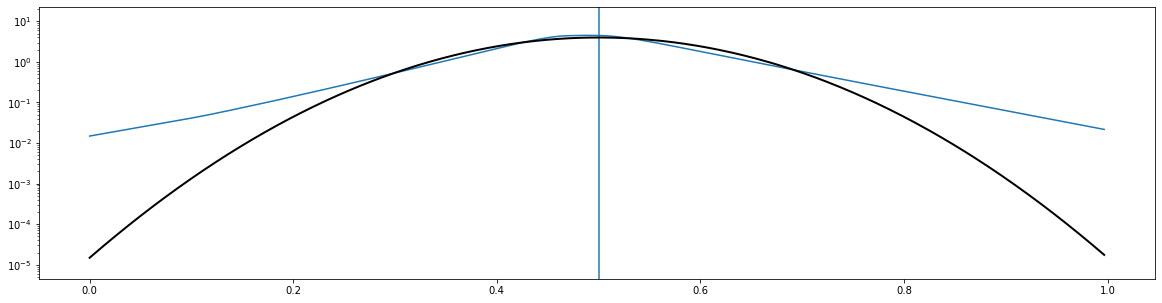

In [16]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 1, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 1000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4967])
x_err tensor([0.3059])
z_mean tensor([[0.4969]])
z_err tensor([[0.2914]])
Start training
Epoch: 0 []n 0
Epoch: 0 []n 1
Epoch: 0 []n 2


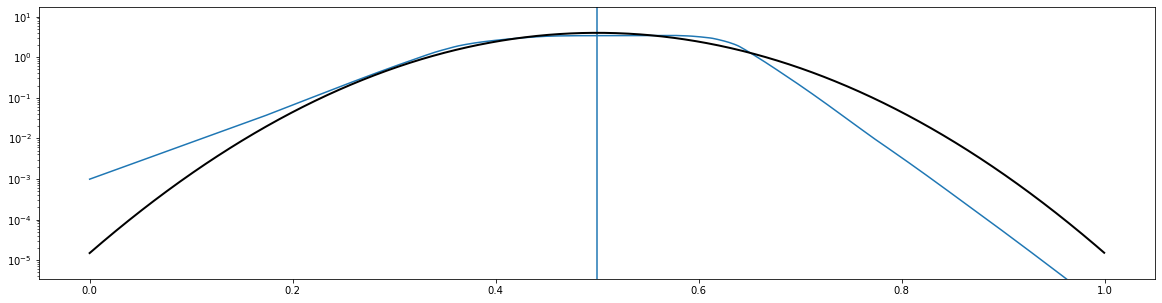

In [17]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 1, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 3000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 0 []n 1
Epoch: 0 []n 2


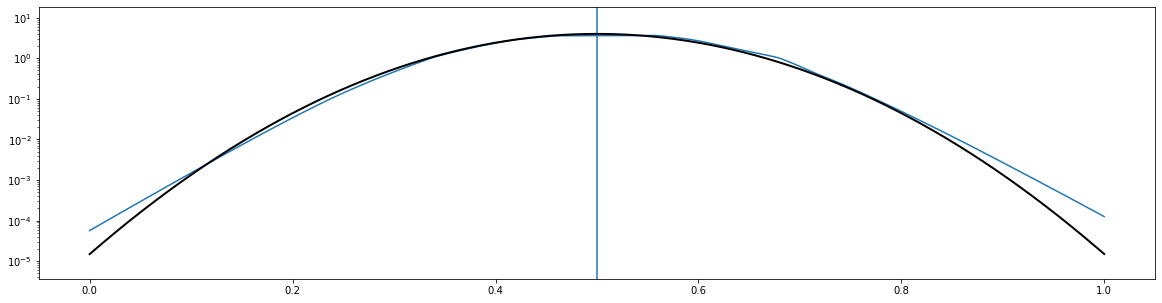

In [18]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 1, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4969])
x_err tensor([0.3099])
z_mean tensor([[0.4933]])
z_err tensor([[0.2910]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.9261428294703364]
Epoch: 2 [1.9261428294703364, 1.8670168863609433]
Epoch: 0 []n 1
Epoch: 1 [1.7010670299641788]
Epoch: 2 [1.7010670299641788, 1.6991553609259427]
Epoch: 0 []n 2
Epoch: 1 [1.69780578231439]
Epoch: 2 [1.69780578231439, 1.697642827872187]


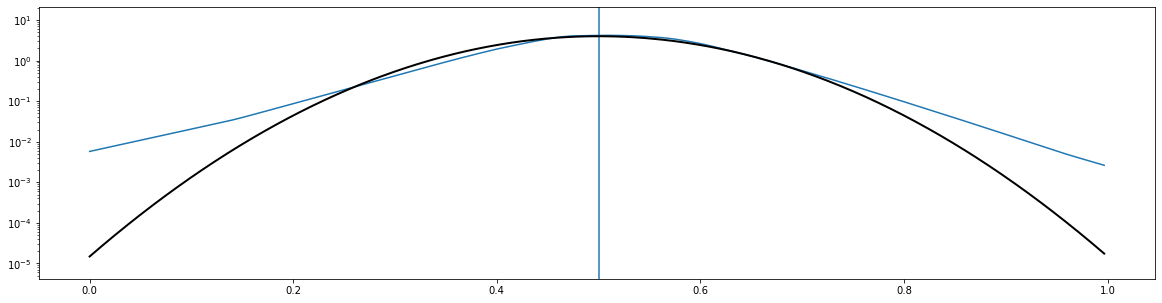

In [19]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 3, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 1000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4969])
x_err tensor([0.3099])
z_mean tensor([[0.4933]])
z_err tensor([[0.2910]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.9261428294703364]
Epoch: 2 [1.9261428294703364, 1.8670168863609433]
Epoch: 3 [1.9261428294703364, 1.8670168863609433, 1.8486219607293606]
Epoch: 4 [1.9261428294703364, 1.8670168863609433, 1.8486219607293606, 1.8370808949694037]
Epoch: 5 [1.9261428294703364, 1.8670168863609433, 1.8486219607293606, 1.8370808949694037, 1.806945713236928]
Epoch: 6 [1.9261428294703364, 1.8670168863609433, 1.8486219607293606, 1.8370808949694037, 1.806945713236928, 1.770409137941897]
Epoch: 7 [1.9261428294703364, 1.8670168863609433, 1.8486219607293606, 1.8370808949694037, 1.806945713236928, 1.770409137941897, 1.7439994318410754]
Epoch: 8 [1.9261428294703364, 1.8670168863609433, 1.8486219607293606, 1.8370808949694037, 1.806945713236928, 1.770409137941897, 1.7439994318410754, 1.732520880177617]
Epoch: 9 [1.9261428294703364, 1.8670168863609433, 1.8486219607293

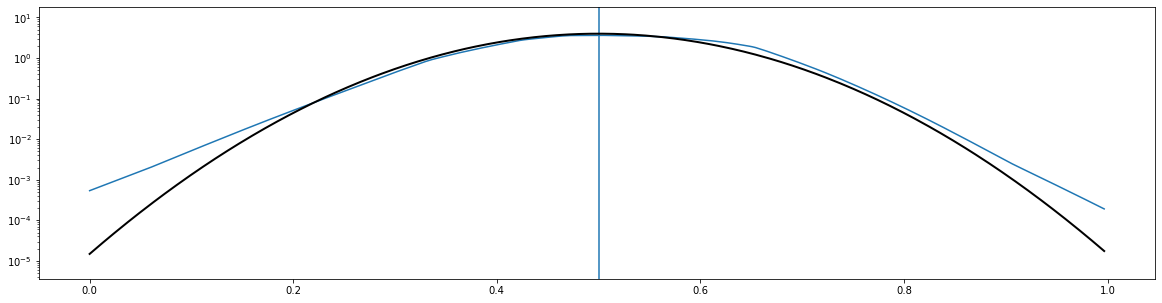

In [20]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 10, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 1000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.6823473228141665]
Epoch: 2 [1.6823473228141665, 1.6788088884204626]
Epoch: 3 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572]
Epoch: 4 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831]
Epoch: 5 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831, 1.6671860590577126]
Epoch: 6 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831, 1.6671860590577126, 1.6709915986284614]
Epoch: 0 []n 1
Epoch: 1 [1.6384091675281525]
Epoch: 2 [1.6384091675281525, 1.638711517676711]
Epoch: 0 []n 2
Epoch: 1 [1.6384848048910499]
Epoch: 2 [1.6384848048910499, 1.6392327640205622]


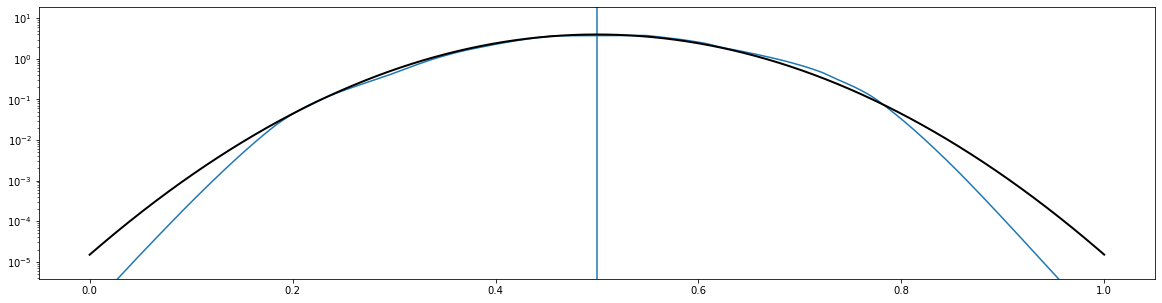

In [21]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 10, early_stopping_patience = 2, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.6823473228141665]
Epoch: 0 []n 1
Epoch: 1 [1.6416284767910838]
Epoch: 0 []n 2
Epoch: 1 [1.6412757774814963]


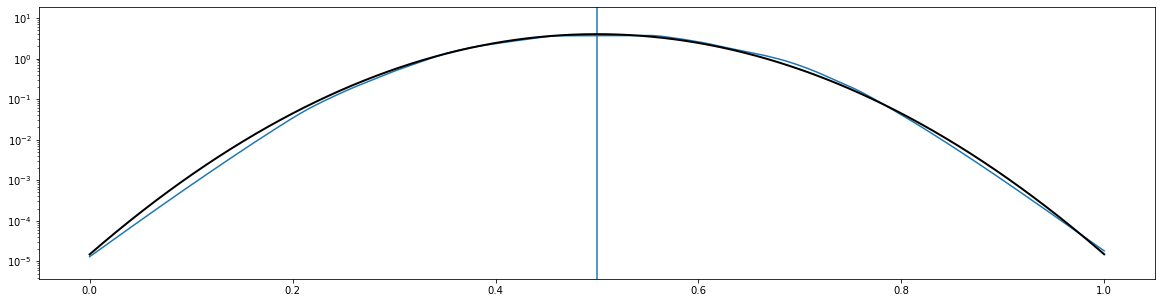

In [22]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 2, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.6823473228141665]
Epoch: 2 [1.6823473228141665, 1.6788088884204626]
Epoch: 0 []n 1
Epoch: 1 [1.6383988475427032]
Epoch: 2 [1.6383988475427032, 1.639615073800087]
Epoch: 0 []n 2
Epoch: 1 [1.6377869928255677]
Epoch: 2 [1.6377869928255677, 1.6387155866250396]


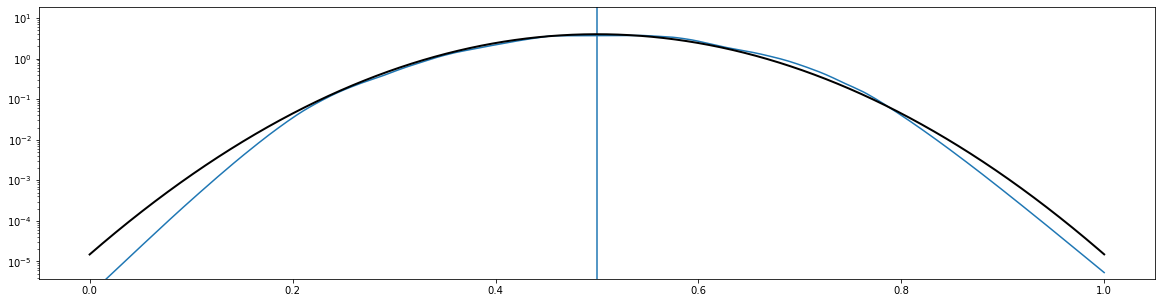

In [23]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 3, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.6823473228141665]
Epoch: 2 [1.6823473228141665, 1.6788088884204626]
Epoch: 3 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572]
Epoch: 0 []n 1
Epoch: 1 [1.638068376109004]
Epoch: 2 [1.638068376109004, 1.6383924316614866]
Epoch: 3 [1.638068376109004, 1.6383924316614866, 1.6385348876938224]
Epoch: 0 []n 2
Epoch: 1 [1.6380892172455788]
Epoch: 2 [1.6380892172455788, 1.639002425596118]
Epoch: 3 [1.6380892172455788, 1.639002425596118, 1.6396271008998156]


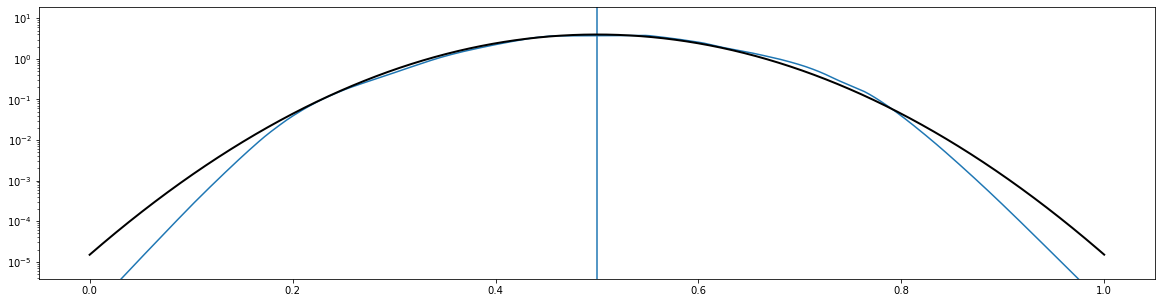

In [24]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 4, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.6823473228141665]
Epoch: 2 [1.6823473228141665, 1.6788088884204626]
Epoch: 3 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572]
Epoch: 4 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831]
Epoch: 5 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831, 1.6671860590577126]
Epoch: 6 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831, 1.6671860590577126, 1.6709915986284614]
Epoch: 7 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831, 1.6671860590577126, 1.6709915986284614, 1.6724140085279942]
Epoch: 8 [1.6823473228141665, 1.6788088884204626, 1.6744640283286572, 1.6677162544801831, 1.6671860590577126, 1.6709915986284614, 1.6724140085279942, 1.671286765486002]
Epoch: 9 [1.6823473228141665, 1.6788088884204626, 1.674464

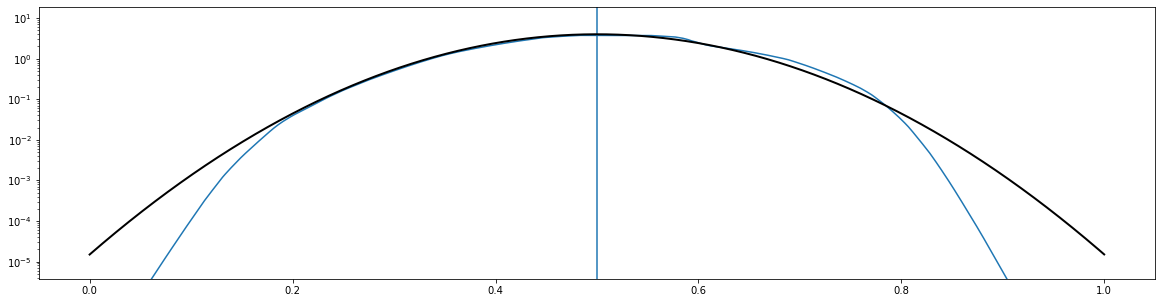

In [25]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 100, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 0 []n 1
Epoch: 0 []n 2


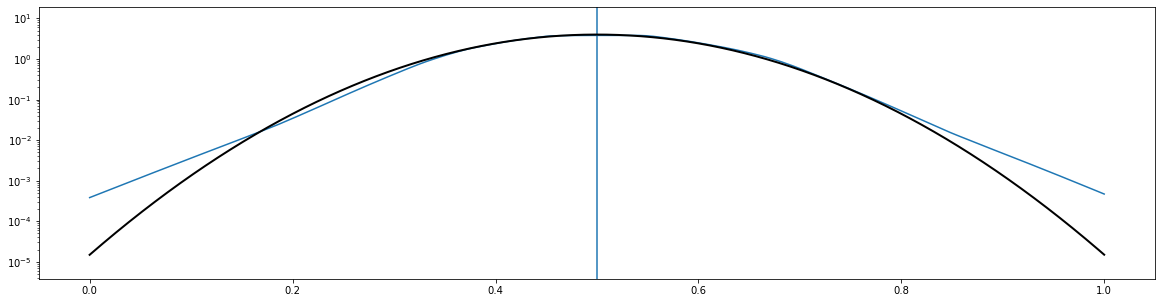

In [26]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 1, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nbatch = 32, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4974])
x_err tensor([0.3030])
z_mean tensor([[0.4982]])
z_err tensor([[0.2873]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.7371890246868134]
Epoch: 2 [1.7371890246868134, 1.6946099177002907]
Epoch: 0 []n 1
Epoch: 1 [1.5920090824365616]
Epoch: 2 [1.5920090824365616, 1.592854380607605]
Epoch: 0 []n 2
Epoch: 1 [1.591306872665882]
Epoch: 2 [1.591306872665882, 1.591213546693325]


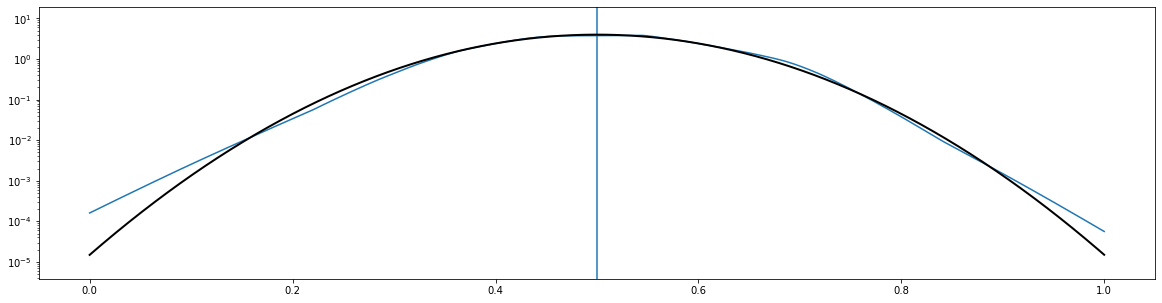

In [27]:
np.random.seed(25)
torch.manual_seed(25)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 3, early_stopping_patience = 5, recycle_net = False, threshold = 1e-7, nbatch = 32, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4990])
x_err tensor([0.3043])
z_mean tensor([[0.4985]])
z_err tensor([[0.2865]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.8098546899855137]
Epoch: 2 [1.8098546899855137, 1.79412479698658]
Epoch: 3 [1.8098546899855137, 1.79412479698658, 1.7791377091780305]
Epoch: 4 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333]
Epoch: 5 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594]
Epoch: 6 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776]
Epoch: 7 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764]
Epoch: 8 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764, 1.7337219575420022]
Epoch: 9 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7

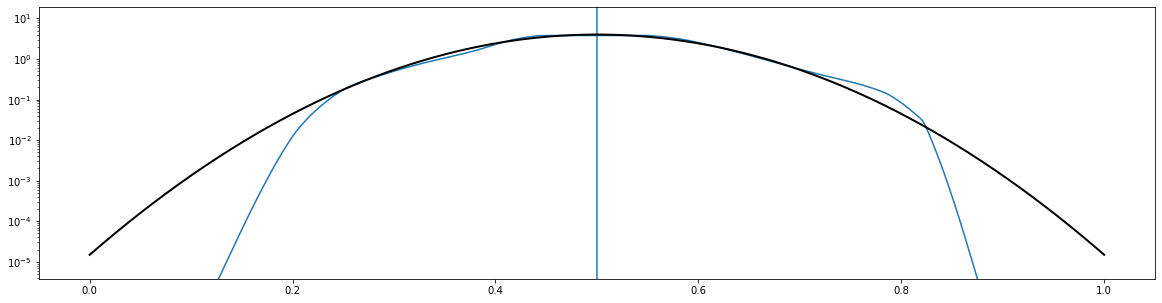

In [28]:
np.random.seed(35)
torch.manual_seed(35)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 100, early_stopping_patience = 20, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4990])
x_err tensor([0.3043])
z_mean tensor([[0.4985]])
z_err tensor([[0.2865]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.8098546899855137]
Epoch: 2 [1.8098546899855137, 1.79412479698658]
Epoch: 3 [1.8098546899855137, 1.79412479698658, 1.7791377091780305]
Epoch: 4 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333]
Epoch: 5 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594]
Epoch: 6 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776]
Epoch: 7 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764]
Epoch: 8 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764, 1.7337219575420022]
Epoch: 9 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7

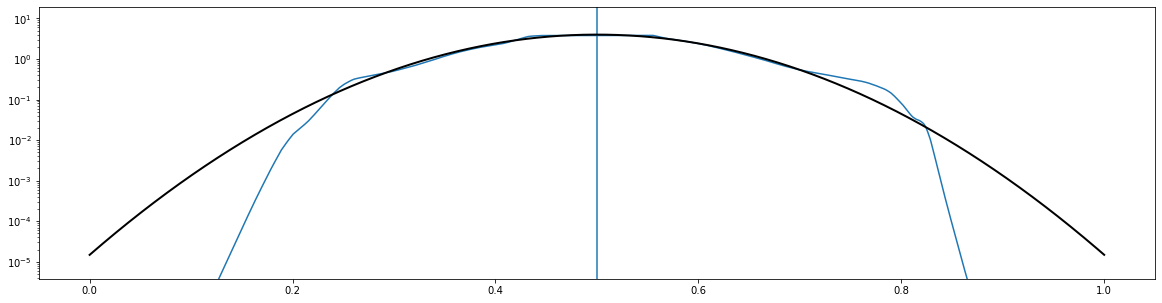

In [29]:
np.random.seed(35)
torch.manual_seed(35)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 100, early_stopping_patience = 20, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4990])
x_err tensor([0.3043])
z_mean tensor([[0.4985]])
z_err tensor([[0.2865]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.8098546899855137]
Epoch: 2 [1.8098546899855137, 1.79412479698658]
Epoch: 3 [1.8098546899855137, 1.79412479698658, 1.7791377091780305]
Epoch: 4 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333]
Epoch: 5 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594]
Epoch: 6 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776]
Epoch: 7 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764]
Epoch: 8 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764, 1.7337219575420022]
Epoch: 9 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7

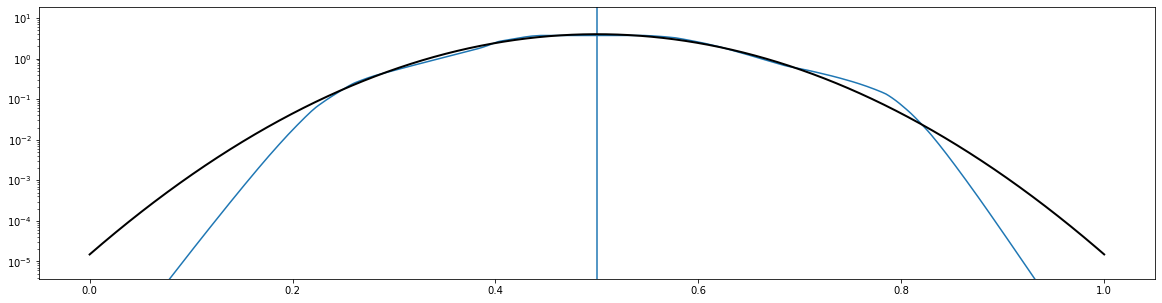

In [30]:
np.random.seed(35)
torch.manual_seed(35)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 100, early_stopping_patience = 2, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4990])
x_err tensor([0.3043])
z_mean tensor([[0.4985]])
z_err tensor([[0.2865]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.8098546899855137]
Epoch: 2 [1.8098546899855137, 1.79412479698658]
Epoch: 3 [1.8098546899855137, 1.79412479698658, 1.7791377091780305]
Epoch: 4 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333]
Epoch: 5 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594]
Epoch: 6 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776]
Epoch: 7 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764]
Epoch: 8 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333, 1.7552747279405594, 1.7489770697429776, 1.7433082116767764, 1.7337219575420022]
Epoch: 0 []n 1
Epoch: 1 [1.699859755113721]
Epoch: 2 [1.699859755113721

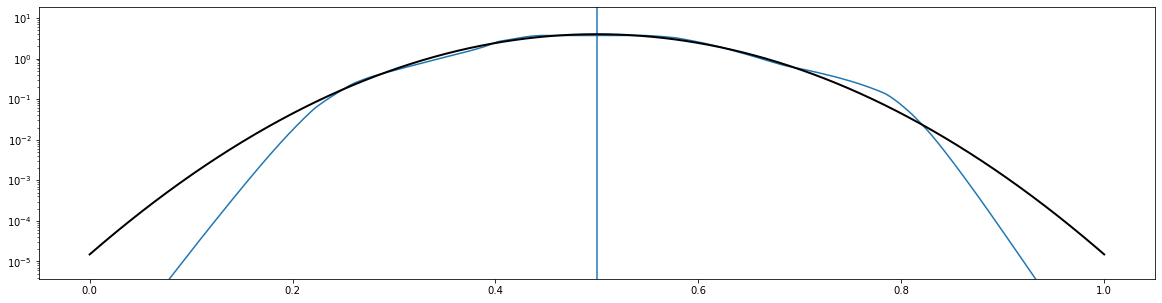

In [31]:
np.random.seed(35)
torch.manual_seed(35)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 100, early_stopping_patience = 1, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.4990])
x_err tensor([0.3043])
z_mean tensor([[0.4985]])
z_err tensor([[0.2865]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.8098546899855137]
Epoch: 2 [1.8098546899855137, 1.79412479698658]
Epoch: 3 [1.8098546899855137, 1.79412479698658, 1.7791377091780305]
Epoch: 4 [1.8098546899855137, 1.79412479698658, 1.7791377091780305, 1.7612058902159333]
Epoch: 0 []n 1
Epoch: 1 [1.6989489430561662]
Epoch: 2 [1.6989489430561662, 1.6961462972685695]
Epoch: 3 [1.6989489430561662, 1.6961462972685695, 1.6946252407506108]
Epoch: 4 [1.6989489430561662, 1.6961462972685695, 1.6946252407506108, 1.6937561770901084]
Epoch: 0 []n 2
Epoch: 1 [1.6912198117934167]
Epoch: 2 [1.6912198117934167, 1.6910675410181284]
Epoch: 3 [1.6912198117934167, 1.6910675410181284, 1.6909605590626597]
Epoch: 4 [1.6912198117934167, 1.6910675410181284, 1.6909605590626597, 1.6908598318696022]


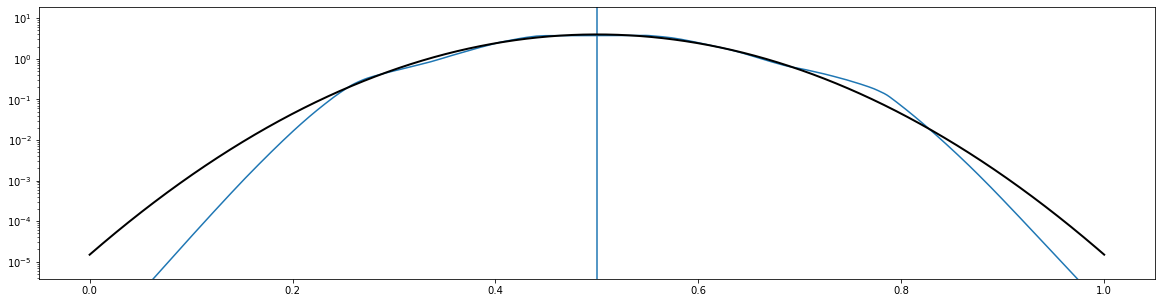

In [32]:
np.random.seed(35)
torch.manual_seed(35)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 5, early_stopping_patience = 1, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)

Normalizations
x_mean tensor([0.5005])
x_err tensor([0.3040])
z_mean tensor([[0.5001]])
z_err tensor([[0.2877]])
Start training
Epoch: 0 []n 0
Epoch: 1 [1.641247808933258]
Epoch: 2 [1.641247808933258, 1.641054761596024]
Epoch: 3 [1.641247808933258, 1.641054761596024, 1.6404953096061945]
Epoch: 4 [1.641247808933258, 1.641054761596024, 1.6404953096061945, 1.6393249947577715]
Epoch: 0 []n 1
Epoch: 1 [1.6203125724568963]
Epoch: 0 []n 2
Epoch: 1 [1.6158060347661376]
Epoch: 2 [1.6158060347661376, 1.615151378326118]
Epoch: 3 [1.6158060347661376, 1.615151378326118, 1.615052186883986]


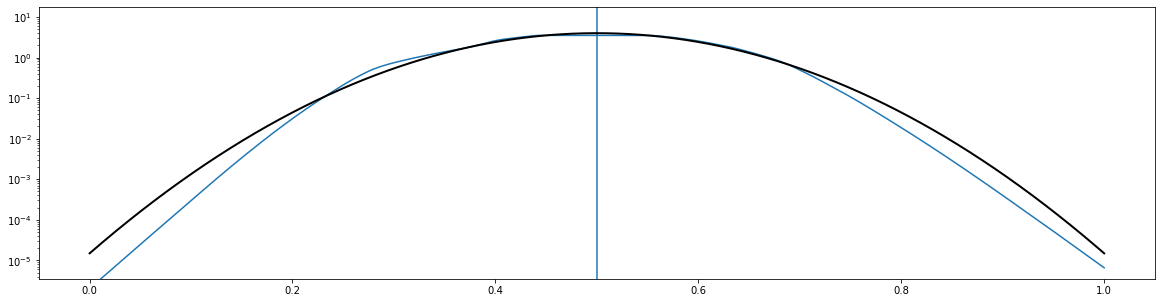

In [33]:
np.random.seed(15)
torch.manual_seed(15)
sw = swyft.SWYFT(x0, model, zdim = 1, device = DEVICE, head = None, noisemodel = noisemodel)
sw.run(max_epochs = 5, early_stopping_patience = 1, recycle_net = False, threshold = 1e-7, nsamples = 10000, nl_schedule = [1., 1., 1.], lr_schedule = [1e-3, 1e-4, 1e-5])
plot(sw)